In [ ]:
import pandas as pd


df = pd.read_csv('univ_data_cleaned.csv')
df


,KODE,NAMA,JENJANG,DAYA TAMPUNG 2024,PEMINAT 2023,JENIS PORTOFOLIO,PERGURUAN TINGGI
0,111001,PENDIDIKAN DOKTER HEWAN,Sarjana,84,548.0,Tidak Ada,UNIVERSITAS SYIAH KUALA
1,111002,TEKNIK SIPIL,Sarjana,98,587.0,Tidak Ada,UNIVERSITAS SYIAH KUALA
2,111003,TEKNIK MESIN,Sarjana,42,231.0,Tidak Ada,UNIVERSITAS SYIAH KUALA
3,111004,TEKNIK KIMIA,Sarjana,56,155.0,Tidak Ada,UNIVERSITAS SYIAH KUALA
4,111005,ARSITEKTUR,Sarjana,56,296.0,Tidak Ada,UNIVERSITAS SYIAH KUALA
...,...,...,...,...,...,...,...
4556,713047,HUBUNGAN INTERNASIONAL,Sarjana,48,109.0,Tidak Ada,UNIVERSITAS ISLAM NEGERI ALAUDDIN
4557,713048,KESEJAHTERAAN SOSIAL,Sarjana,48,44.0,Tidak Ada,UNIVERSITAS ISLAM NEGERI ALAUDDIN
4558,732001,INFORMATIKA,Sarjana,45,31.0,Tidak Ada,UNIVERSITAS ISLAM NEGERI DATOKARAMA PALU
4559,732002,ARSITEKTUR,Sarjana,18,5.0,Tidak Ada,UNIVERSITAS ISLAM NEGERI DATOKARAMA PALU


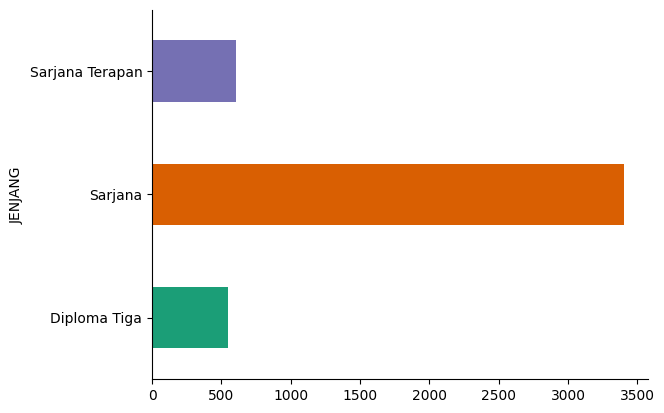

In [ ]:
# @title JENJANG

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('JENJANG').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

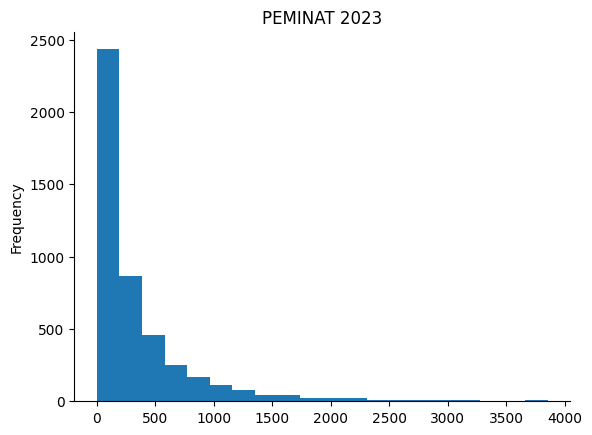

In [ ]:
# @title PEMINAT 2023

from matplotlib import pyplot as plt
df['PEMINAT 2023'].plot(kind='hist', bins=20, title='PEMINAT 2023')
plt.gca().spines[['top', 'right',]].set_visible(False)

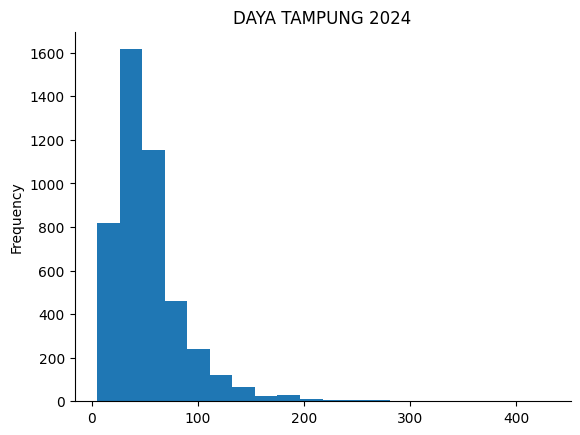

In [ ]:
# @title DAYA TAMPUNG 2024

from matplotlib import pyplot as plt
df['DAYA TAMPUNG 2024'].plot(kind='hist', bins=20, title='DAYA TAMPUNG 2024')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KODE               4561 non-null   int64  
 1   NAMA               4561 non-null   object 
 2   JENJANG            4561 non-null   object 
 3   DAYA TAMPUNG 2024  4561 non-null   int64  
 4   PEMINAT 2023       4561 non-null   float64
 5   JENIS PORTOFOLIO   4561 non-null   object 
 6   PERGURUAN TINGGI   4561 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 249.6+ KB


In [ ]:
df['PEMINAT 2023'] = df['PEMINAT 2023'].astype(int)

In [ ]:
df.describe()

,KODE,DAYA TAMPUNG 2024,PEMINAT 2023
count,4561.000000,4561.000000,4561.000000
mean,427111.263758,52.555361,346.191186
std,215479.094318,35.253544,490.838998
min,111001.000000,5.000000,0.000000
25%,321007.000000,30.000000,55.000000
50%,371074.000000,45.000000,172.000000
75%,611019.000000,64.000000,431.000000
max,931006.000000,430.000000,3856.000000


In [ ]:
print(df.isnull().sum())

KODE                 0
NAMA                 0
JENJANG              0
DAYA TAMPUNG 2024    0
PEMINAT 2023         0
JENIS PORTOFOLIO     0
PERGURUAN TINGGI     0
dtype: int64


In [ ]:
# Assuming df is your DataFrame containing the data
# df['NAMA'] contains the names of majors
# Use value_counts() to count the occurrences of each major
major_counts = df['NAMA'].value_counts()

# Display the counts of each major
print("Counts of each major:")
major_counts


Counts of each major:


NAMA
AKUNTANSI                                    109
TEKNIK SIPIL                                  79
TEKNIK MESIN                                  76
MANAJEMEN                                     67
MATEMATIKA                                    61
                                            ... 
KEUANGAN DAERAH                                1
EKONOMI SYARIAH KAMPUS BONDOWOSO               1
PEND. GURU SEKOLAH DASAR KAMPUS BONDOWOSO      1
SENI DRAMA TARI DAN MUSIK                      1
TEKNIK PERENCANAAN WILAYAH DAN KOTA            1
Name: count, Length: 1197, dtype: int64

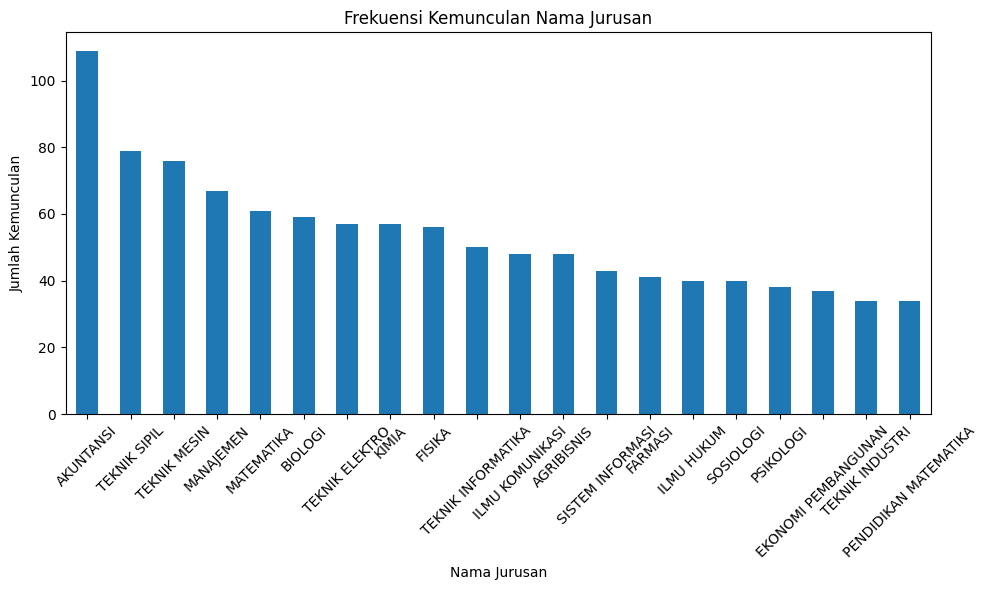

In [ ]:
nama_counts = df['NAMA'].value_counts().head(20)

# Membuat plot bar untuk visualisasi
plt.figure(figsize=(10, 6))
nama_counts.plot(kind='bar')
plt.xlabel('Nama Jurusan')
plt.ylabel('Jumlah Kemunculan')
plt.title('Frekuensi Kemunculan Nama Jurusan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**** Top 10 Univ Peminat Terbanyak ****

In [ ]:
total_peminat_per_universitas = df.groupby('PERGURUAN TINGGI')['PEMINAT 2023'].sum().reset_index()

top_20_universitas = total_peminat_per_universitas.nlargest(20, 'PEMINAT 2023')

print("Top 20 universitas dengan jumlah peminat paling banyak pada tahun 2023:")
print(top_20_universitas)

Top 20 universitas dengan jumlah peminat paling banyak pada tahun 2023:
                     PERGURUAN TINGGI  PEMINAT 2023
61              UNIVERSITAS BRAWIJAYA         62327
64            UNIVERSITAS GADJAH MADA         59412
67              UNIVERSITAS INDONESIA         59177
117         UNIVERSITAS SEBELAS MARET         58014
63             UNIVERSITAS DIPONEGORO         54018
113  UNIVERSITAS PENDIDIKAN INDONESIA         52806
108           UNIVERSITAS PADJADJARAN         50909
98         UNIVERSITAS NEGERI JAKARTA         43388
124        UNIVERSITAS SUMATERA UTARA         41175
105       UNIVERSITAS NEGERI SURABAYA         40920
66             UNIVERSITAS HASANUDDIN         39005
106     UNIVERSITAS NEGERI YOGYAKARTA         37566
88     UNIVERSITAS JENDERAL SOEDIRMAN         35590
104       UNIVERSITAS NEGERI SEMARANG         34204
56              UNIVERSITAS AIRLANGGA         33950
121             UNIVERSITAS SRIWIJAYA         33128
133             UPN "VETERAN" JAKARTA       

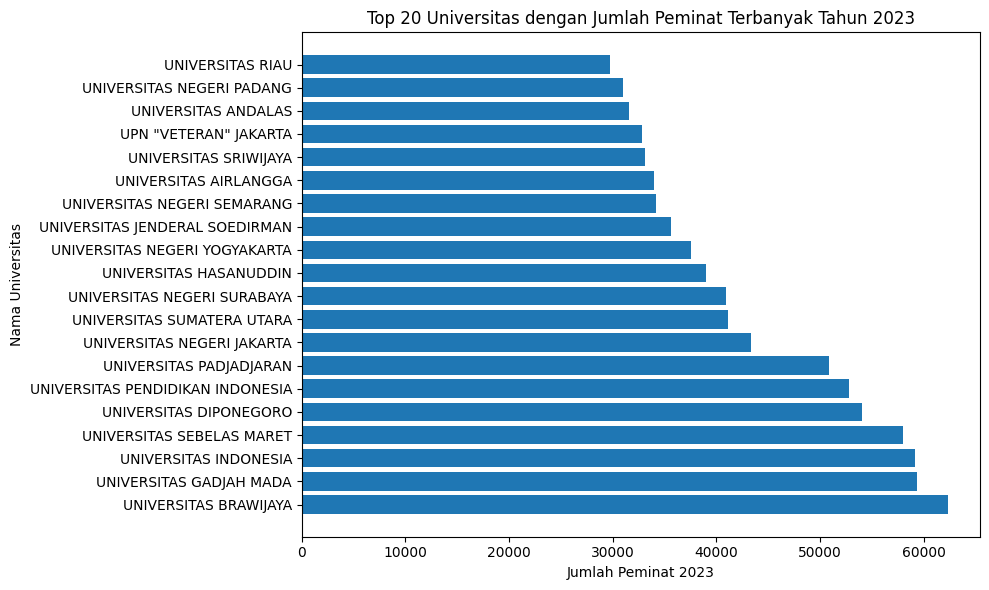

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_20_universitas['PERGURUAN TINGGI'], top_20_universitas['PEMINAT 2023'])
plt.xlabel('Jumlah Peminat 2023')
plt.ylabel('Nama Universitas')
plt.title('Top 20 Universitas dengan Jumlah Peminat Terbanyak Tahun 2023')
plt.tight_layout()
plt.show()

In [ ]:
jurusan_top = df.groupby('NAMA')['PEMINAT 2023'].sum().reset_index()

top_20_jurusan = jurusan_top.nlargest(20, 'PEMINAT 2023')

print("Top 20 jurusan dengan jumlah peminat paling banyak pada tahun 2023:")
top_20_jurusan

Top 20 jurusan dengan jumlah peminat paling banyak pada tahun 2023:


,NAMA,PEMINAT 2023
361,MANAJEMEN,84340
52,AKUNTANSI,63257
268,ILMU KOMUNIKASI,57627
797,PSIKOLOGI,54772
251,ILMU HUKUM,44576
192,FARMASI,42905
945,TEKNIK INFORMATIKA,38540
299,KEDOKTERAN,35803
1048,TEKNIK SIPIL,33289
587,PENDIDIKAN DOKTER,31894


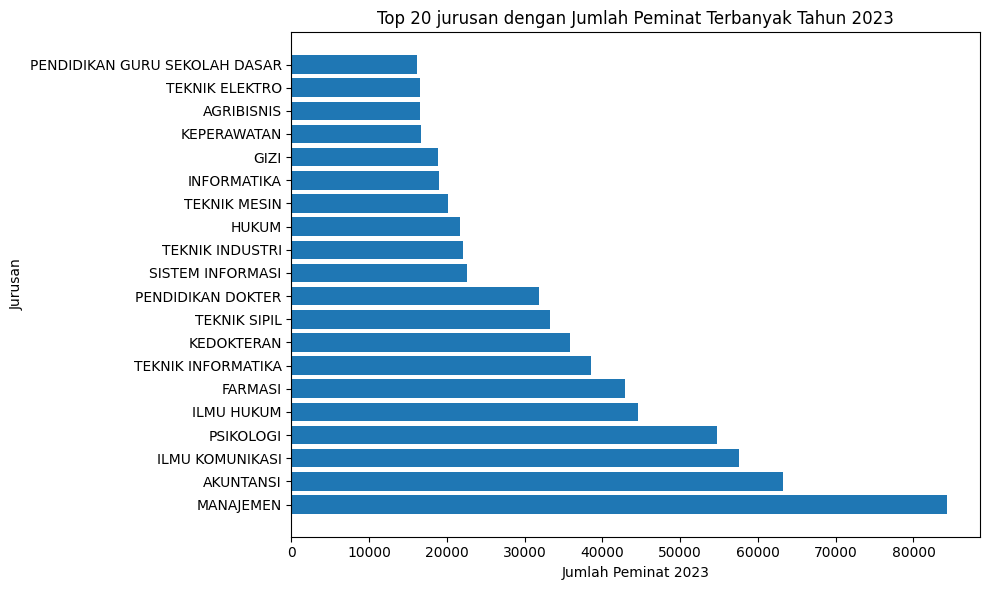

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_20_jurusan['NAMA'], top_20_jurusan['PEMINAT 2023'])
plt.xlabel('Jumlah Peminat 2023')
plt.ylabel('Jurusan')
plt.title('Top 20 jurusan dengan Jumlah Peminat Terbanyak Tahun 2023')
plt.tight_layout()
plt.show()

In [ ]:
df_sorted = df.sort_values(by='PEMINAT 2023', ascending=False)

df_sorted.head(10)

,KODE,NAMA,JENJANG,DAYA TAMPUNG 2024,PEMINAT 2023,JENIS PORTOFOLIO,PERGURUAN TINGGI
1098,333001,PENDIDIKAN DOKTER,Sarjana,87,3856,Tidak Ada,UNIVERSITAS PADJADJARAN
1093,332021,SEKOLAH TEKNIK ELEKTRO DAN INFORMATIKA - KOMPU...,Sarjana,90,3848,Tidak Ada,INSTITUT TEKNOLOGI BANDUNG
1735,361084,PSIKOLOGI,Sarjana,68,3837,Tidak Ada,UNIVERSITAS GADJAH MADA
874,321001,PENDIDIKAN DOKTER,Sarjana,83,3827,Tidak Ada,UNIVERSITAS INDONESIA
1672,361006,KEDOKTERAN,Sarjana,54,3766,Tidak Ada,UNIVERSITAS GADJAH MADA
1043,324016,ILMU KOMUNIKASI,Sarjana,180,3728,Tidak Ada,"UPN ""VETERAN"" JAKARTA"
2858,711007,PENDIDIKAN DOKTER,Sarjana,131,3681,Tidak Ada,UNIVERSITAS HASANUDDIN
1578,355048,PSIKOLOGI,Sarjana,123,3617,Tidak Ada,UNIVERSITAS DIPONEGORO
1426,353001,KEDOKTERAN,Sarjana,77,3551,Tidak Ada,UNIVERSITAS SEBELAS MARET
979,323027,PSIKOLOGI,Sarjana,180,3533,Tidak Ada,UNIVERSITAS NEGERI JAKARTA


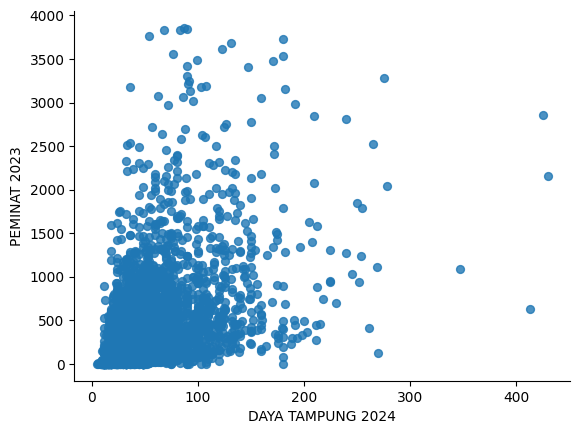

In [ ]:
# @title DAYA TAMPUNG 2024 vs PEMINAT 2023

from matplotlib import pyplot as plt
df_sorted.plot(kind='scatter', x='DAYA TAMPUNG 2024', y='PEMINAT 2023', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
jurusan_top = df.groupby('NAMA')['PEMINAT 2023'].sum().reset_index()

top_20_jurusan = jurusan_top.nlargest(300, 'PEMINAT 2023')

print("Top 20 jurusan dengan jumlah peminat paling banyak pada tahun 2023:")
top_20_jurusan

Top 20 jurusan dengan jumlah peminat paling banyak pada tahun 2023:


,NAMA,PEMINAT 2023
361,MANAJEMEN,84340
52,AKUNTANSI,63257
268,ILMU KOMUNIKASI,57627
797,PSIKOLOGI,54772
251,ILMU HUKUM,44576
...,...,...
1180,TEKNOLOGI SAINS DATA,645
185,FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM ...,644
678,PENDIDIKAN TEKNOLOGI INFORMATIKA DAN KOMPUTER,644
1068,TEKNOLOGI BIOPROSES,639


In [ ]:
top_20_jurusan.to_csv('major_data.csv', index=False)
